# Tomatoleaf Dataset Analysis

This notebook provides a breakdown and visualization of the **tomatoleaf** dataset.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import random

# Setup plotting style
plt.style.use('ggplot')
%matplotlib inline

In [20]:
# Configuration
DATASET_NAME = "tomatoleaf"
PROCESSED_DIR = "TomatoLeaf_processed"
# Path relative to this notebook (notebooks/datasets/)
DATA_ROOT = Path("../../data/processed/dataset")
CSV_PATH = DATA_ROOT / PROCESSED_DIR / "labels.csv"

In [21]:
# Load the dataset metadata
if not CSV_PATH.exists():
    print(f"Error: Labels file not found at {CSV_PATH}")
else:
    df = pd.read_csv(CSV_PATH)
    print(f"Successfully loaded {len(df)} records.")
    display(df.head())

Successfully loaded 1359 records.


,filename,label,crop,disease,source,path
0,IMG_0210_JPG.rf.88fef2f797fa888a725ec075a039aa...,tomato_healthy,tomato,healthy,tomato_leaf_raw,TomatoLeaf_processed/images/IMG_0210_JPG.rf.88...
1,IMG_0211_JPG.rf.e63eae2f4e0a7ba599feed7fc4dc84...,tomato_healthy,tomato,healthy,tomato_leaf_raw,TomatoLeaf_processed/images/IMG_0211_JPG.rf.e6...
2,IMG_0212_JPG.rf.51e464fbdd411d448fd79bb32b807b...,tomato_healthy,tomato,healthy,tomato_leaf_raw,TomatoLeaf_processed/images/IMG_0212_JPG.rf.51...
3,IMG_0212_JPG.rf.72f9bdc6599adddf2dc541fb4f939b...,tomato_healthy,tomato,healthy,tomato_leaf_raw,TomatoLeaf_processed/images/IMG_0212_JPG.rf.72...
4,IMG_0212_JPG.rf.f9feb4b8c032613cf639b801f7a934...,tomato_healthy,tomato,healthy,tomato_leaf_raw,TomatoLeaf_processed/images/IMG_0212_JPG.rf.f9...


## 1. Class Distribution
Let's look at how the images are distributed across different classes.

Total Classes: 7


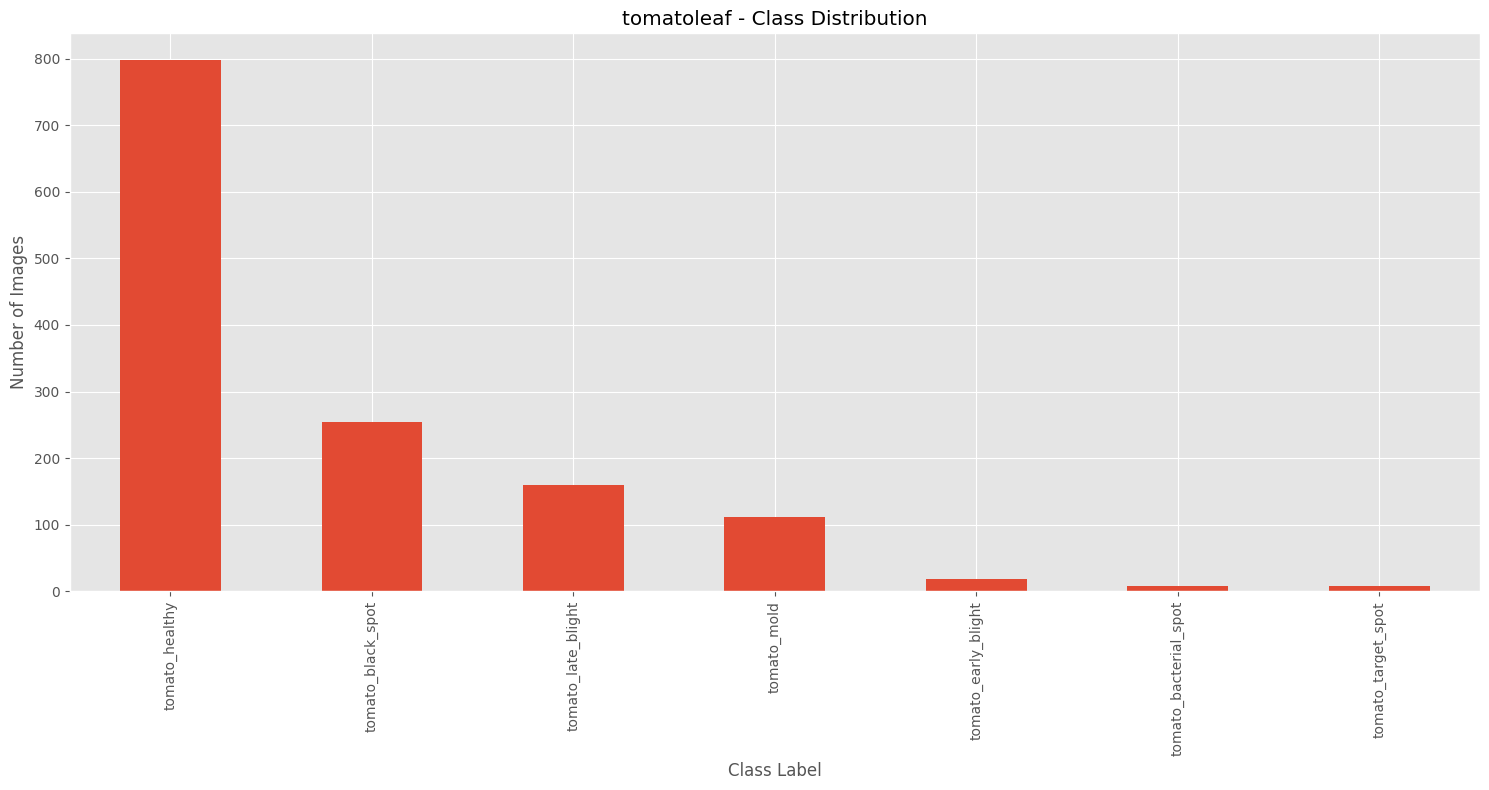

,Count
label,
tomato_healthy,798
tomato_black_spot,255
tomato_late_blight,160
tomato_mold,112
tomato_early_blight,18
tomato_bacterial_spot,8
tomato_target_spot,8


In [22]:
if 'df' in locals():
    class_counts = df['label'].value_counts()
    print(f"Total Classes: {len(class_counts)}")
    
    # Plot
    plt.figure(figsize=(15, 8))
    class_counts.plot(kind='bar')
    plt.title(f"{DATASET_NAME} - Class Distribution")
    plt.xlabel("Class Label")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    display(class_counts.to_frame(name='Count'))

## 2. Crop Analysis
Breakdown by crop type (extracted from labels).

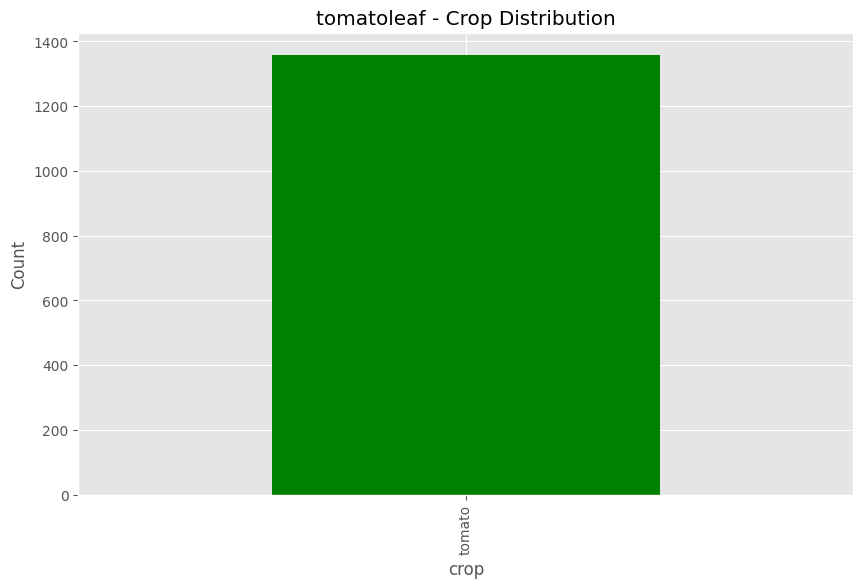

,Count
crop,
tomato,1359


In [23]:
if 'df' in locals() and 'crop' in df.columns:
    crop_counts = df['crop'].value_counts()
    
    plt.figure(figsize=(10, 6))
    crop_counts.plot(kind='bar', color='green')
    plt.title(f"{DATASET_NAME} - Crop Distribution")
    plt.ylabel("Count")
    plt.show()
    display(crop_counts.to_frame(name='Count'))

## 3. Sample Images
Displaying random samples from the dataset to verify quality and content.

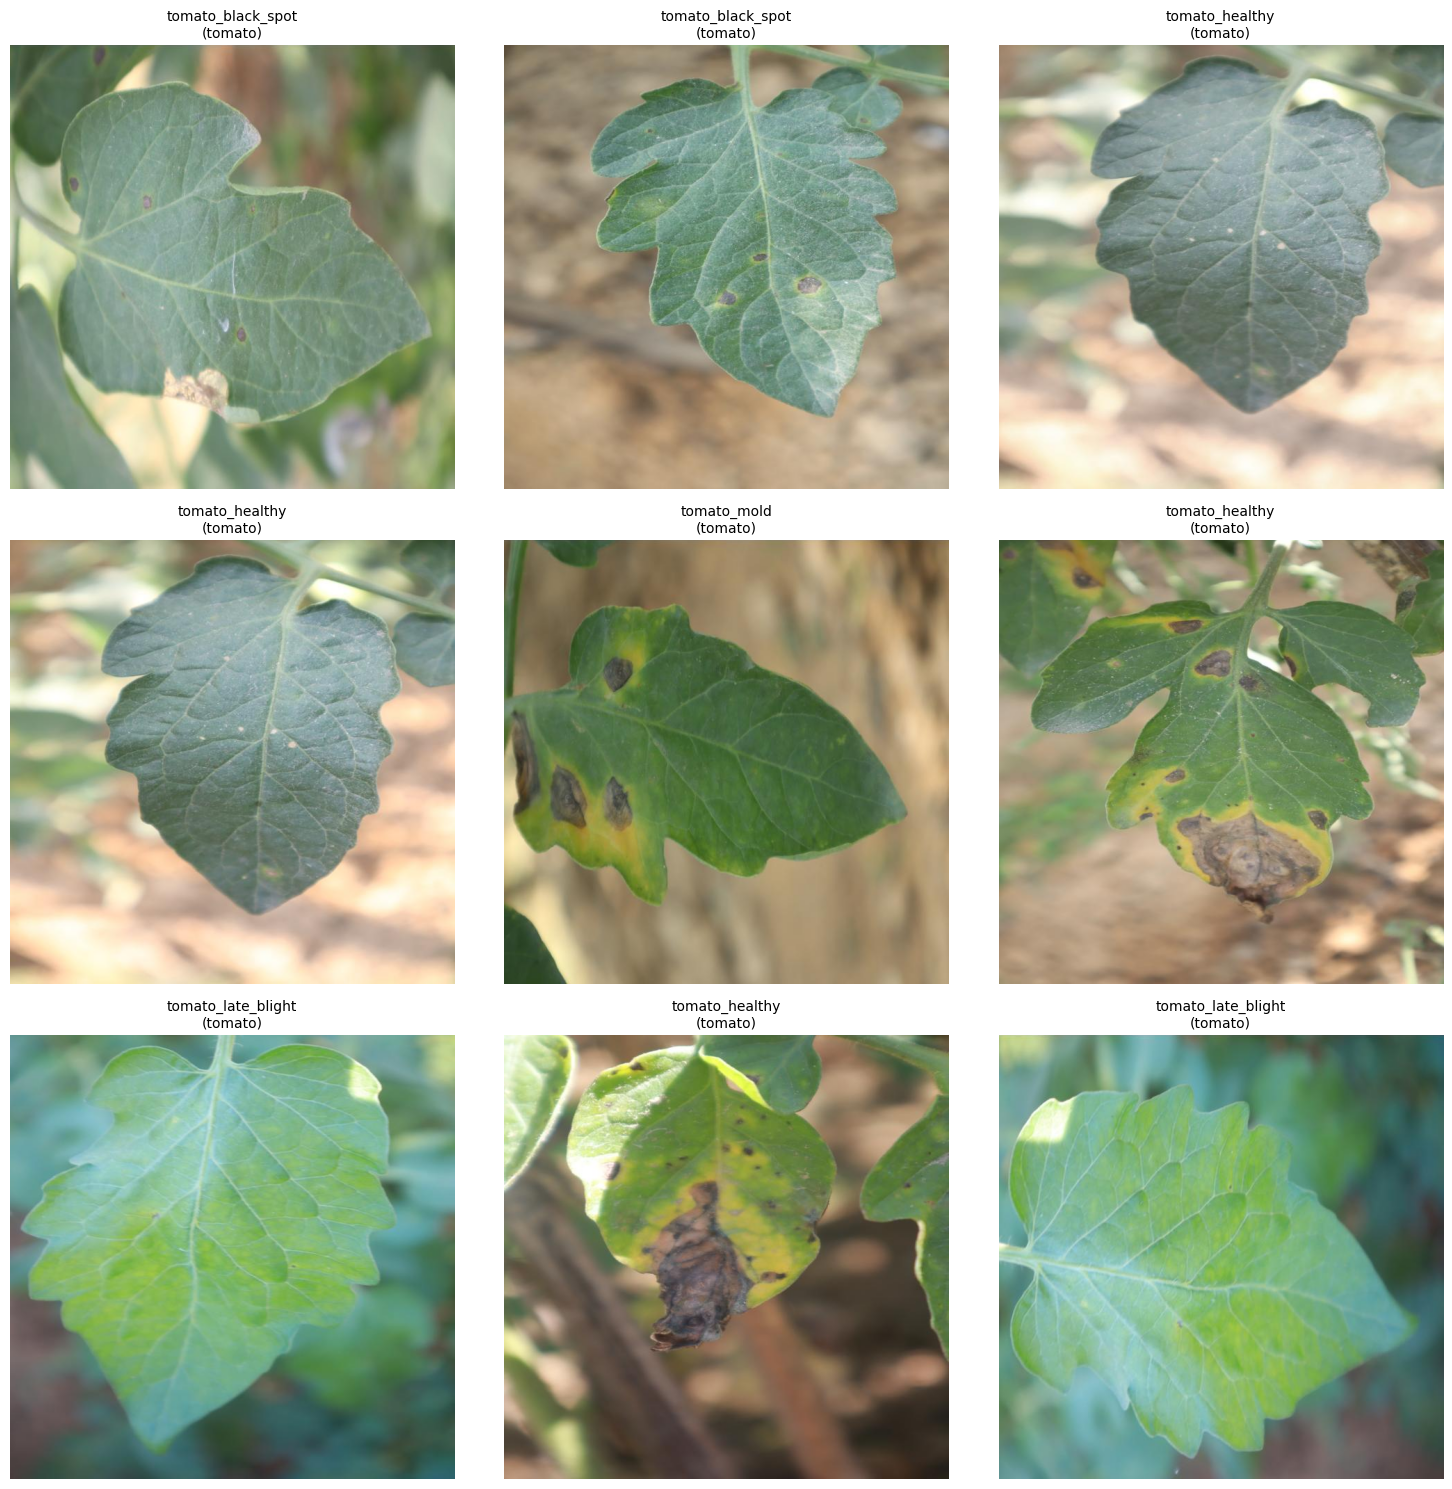

In [24]:
def show_random_samples(df, n=9):
    if df is None or len(df) == 0: return
    
    plt.figure(figsize=(15, 15))
    samples = df.sample(min(n, len(df)))
    
    for i, (_, row) in enumerate(samples.iterrows()):
        plt.subplot(3, 3, i+1)
        # The 'path' column in csv is relative to data/processed/dataset
        img_path = DATA_ROOT / row['path']
        
        try:
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"{row['label']}\n({row['crop']})", fontsize=10)
            plt.axis('off')
        except Exception as e:
            plt.text(0.5, 0.5, f"Error loading image:\n{str(e)}", ha='center')
            plt.axis('off')
            
    plt.tight_layout()
    plt.show()

if 'df' in locals():
    show_random_samples(df)